In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [3]:
df1 = pd.read_csv(r'/kaggle/input/amex-default-prediction/train_data.csv', nrows=10000)
df1.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


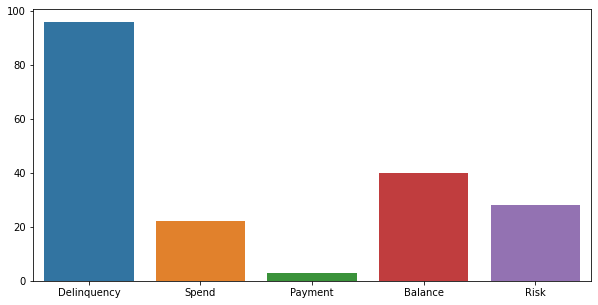

In [4]:
Delinquency = [d for d in df1.columns if d.startswith('D_')]
Spend = [s for s in df1.columns if s.startswith('S_')]
Payment = [p for p in df1.columns if p.startswith('P_')]
Balance = [b for b in df1.columns if b.startswith('B_')]
Risk = [r for r in df1.columns if r.startswith('R_')]
Dict = {'Delinquency': len(Delinquency), 'Spend': len(Spend), 'Payment': len(Payment), 'Balance': len(Balance), 'Risk': len(Risk),}

plt.figure(figsize=(10,5))
sns.barplot(x=list(Dict.keys()), y=list(Dict.values()));

In [5]:
df2 = pd.read_csv(r'/kaggle/input/amex-default-prediction/train_labels.csv', low_memory=True, nrows=10000)
df2.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [6]:
df = pd.merge(df1,df2, on=['customer_ID'])
df.shape

(10000, 191)

In [7]:
df['target'].value_counts(normalize=True)

0    0.7447
1    0.2553
Name: target, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 14.6+ MB


In [9]:
imp_cols = ['customer_ID', 'P_2', 'B_9', 'D_48', 'D_44', 'D_75', 'D_61', 'B_10', 'B_23', 'B_11',
       'D_52', 'B_18', 'B_1', 'B_40', 'D_45', 'D_55', 'B_6', 'D_58', 'B_2',
       'B_7', 'D_42', 'B_3', 'B_8', 'R_27', 'B_20', 'D_74', 'D_43', 'D_62',
       'B_37', 'B_4', 'P_4', 'P_3', 'S_2', 'D_63', 'D_64', 'target']

In [10]:
df3 = df[['customer_ID', 'P_2', 'B_9', 'D_48', 'D_44', 'D_75', 'D_61', 'B_10', 'B_23', 'B_11',
       'D_52', 'B_18', 'B_1', 'B_40', 'D_45', 'D_55', 'B_6', 'D_58', 'B_2',
       'B_7', 'D_42', 'B_3', 'B_8', 'R_27', 'B_20', 'D_74', 'D_43', 'D_62',
       'B_37', 'B_4', 'P_4', 'P_3', 'S_2', 'D_63', 'D_64', 'target']]

In [11]:
x = df3.drop(['customer_ID', 'target'], axis=1)
y = df3['target']

In [12]:
x1 = x.select_dtypes(exclude=['object'])
x1.fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3)

Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, class_weight='balanced')


clf.fit(X_train, y_train)

feature_score = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


In [15]:
pd.set_option('display.max_rows', None)

In [16]:
feature_score

P_2     0.239591
D_44    0.126875
D_48    0.094669
D_61    0.060807
B_9     0.054761
B_7     0.042146
D_52    0.037851
B_23    0.035565
D_45    0.031490
B_6     0.026778
D_75    0.024603
B_10    0.023122
D_55    0.022630
D_42    0.020697
R_27    0.020170
D_62    0.018126
B_2     0.016231
B_1     0.014783
B_8     0.013471
B_18    0.013329
D_43    0.013078
B_11    0.011188
D_74    0.009317
P_3     0.007935
B_37    0.006172
D_58    0.004445
P_4     0.003536
B_3     0.002235
B_4     0.001937
B_40    0.001880
B_20    0.000585
dtype: float64

<AxesSubplot:title={'center':'Top Features'}, ylabel='Variable'>

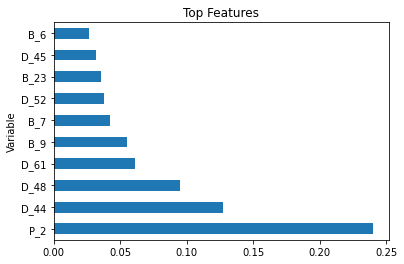

In [17]:
feat_importances = pd.Series(clf.feature_importances_, index=x1.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top Features', ylabel = 'Feat_imp value', xlabel='Variable')

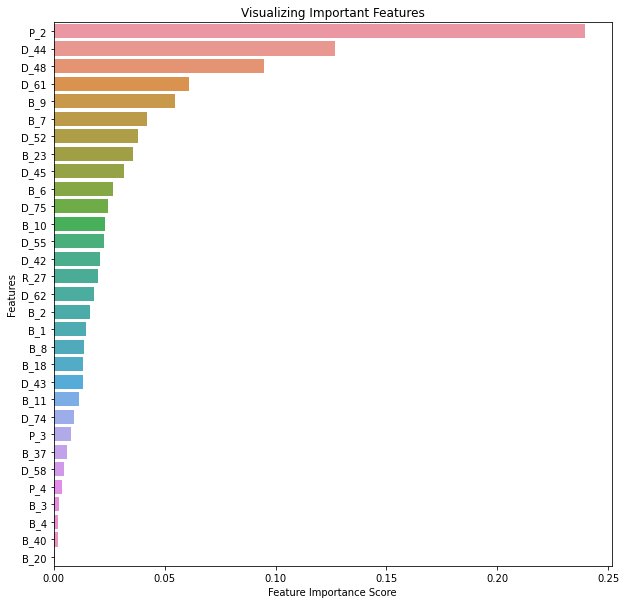

In [18]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=feature_score, y=feature_score.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

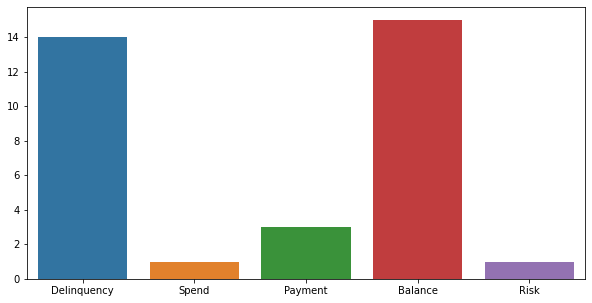

In [19]:
Delinquency = [d for d in df3.columns if d.startswith('D_')]
Spend = [s for s in df3.columns if s.startswith('S_')]
Payment = [p for p in df3.columns if p.startswith('P_')]
Balance = [b for b in df3.columns if b.startswith('B_')]
Risk = [r for r in df3.columns if r.startswith('R_')]
Dict = {'Delinquency': len(Delinquency), 'Spend': len(Spend), 'Payment': len(Payment), 'Balance': len(Balance), 'Risk': len(Risk),}

plt.figure(figsize=(10,5))
sns.barplot(x=list(Dict.keys()), y=list(Dict.values()));

In [20]:
import shap

In [21]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(clf)

In [25]:
choosen_instance = X_test.loc[[12]]
shap_values = explainer.shap_values(choosen_instance)

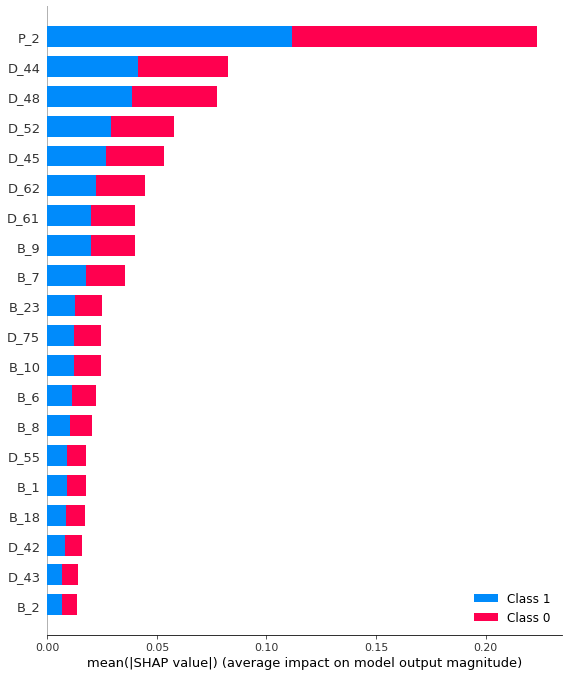

In [26]:
shap.summary_plot(shap_values, X_train)

In [31]:
#rf_shap_values = shap.KernelExplainer(clf.predict,X_test)

In [30]:
#shap.summary_plot(rf_shap_values, X_test)

In [ ]:
# sel_col = feature_score[feature_score>0.01].reset_index()

# df3 = x1.loc[:, sel_col['index'].to_list()].copy()

In [32]:
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 238.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=47c58a455930d4fc6ee9ebe16b203bd93d89cddf1635ff15b112f49bc3aa2b9a
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [34]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc


# filter variable via missing rate, iv, identical value rate
x2 = x1.copy()
x2['target'] = y

dt_s = sc.var_filter(x2, y='target')

# woe binning ------
bins = sc.woebin(dt_s, y="target")
# sc.woebin_plot(bins)
sc.woebin_plot(bins)

In [ ]:
### Bivariate Plot

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

df_plt = pd.DataFrame()
x = x.select_dtypes(exclude=['object'])
for col in x1.columns:
    df_plt['col'] = pd.qcut(x[col], 5, duplicates='drop')
    df_plt['target'] = df['target']
    g = sns.catplot(x=col, y='target', data=df_plt, kind='point', ci=None, aspect=2, dpi=150)
    
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        plt.show()

In [ ]:
univ = x1.describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1])
univ

KS Table

In [ ]:
def ks_metric(target=None, prob=None):
    data = pd.DataFrame()
    data['y'] = target
    data['p'] = prob
    data['y0'] = 1-data['y']
    data['bucket'] = pd.qcut(data['p'].rank(method='first'), 10)
    grouped = data.groupby('bucket', as_index=False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()['p']
    kstable['max_prob'] = grouped.max()['p']
    kstable['events'] = grouped.sum()['y']
    kstable['nonevents'] = grouped.sum()['y0']
    kstable = kstable.sort_values(by='min_prob', ascending=False).reset_index(drop=True)
    kstable['event_rate']=(kstable.events / data['y'].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate']=(kstable.nonevents / data['y0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate'] = (kstable.events / data['y'].sum()).cumsum()
    kstable['cum_noneventrate'] = (kstable.nonevents / data['y0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate'] - kstable['cum_noneventrate'], 3)*100
    kstable['bad_rate'] = (kstable.events / (kstable.events + kstable.nonevents)).apply('{0:.2%}'.format)
    
    kstable['cum_eventrate'] = kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate'] = kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    print("KS is "+ str(max(kstable['KS']))+ "%"+ " at decile"+
         str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)
     

In [ ]:
df3.shape

In [ ]:
pred1 = clf.predict_proba(X_train)
pred2 = clf.predict_proba(X_test)

In [ ]:
yhat1 = pred1[:, 1]
yhat2 = pred2[:, 1]

In [ ]:
yhat

In [ ]:
ks_train = ks_metric(y_train, pred1[:, 1])

In [ ]:
ks_train.to_csv('ks_train.csv', index=False)

In [ ]:
ks_test.to_csv('ks_test.csv', index=False)

In [ ]:
ks_test = ks_metric(y_test, pred2[:, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
roc_auc_score(y_train, yhat1)

In [ ]:
roc_auc_score(y_test, yhat2)

XGBoost

In [ ]:
import xgboost as xgb

xgbc = xgb.XGBRFClassifier(max_depth=6, n_estimators=100, gamma=5)

xgbc.fit(X_train, y_train)

In [ ]:
feature_score2 = pd.Series(xgbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
pred3 = xgbc.predict_proba(X_train)
pred4 = xgbc.predict_proba(X_test)

In [ ]:
yhat3 = pred3[:, 1]
yhat4 = pred4[:, 1]

In [ ]:
ks_train2 = ks_metric(y_train, pred3[:, 1])

In [ ]:
ks_test2 = ks_metric(y_test, pred4[:, 1])

In [ ]:
roc_auc_score(y_train, yhat3)

In [ ]:
roc_auc_score(y_test, yhat4)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=5, solver='liblinear')
lr.fit(X_train, y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
pred5 = lr.predict_proba(X_train)
pred6 = lr.predict_proba(X_test)

In [ ]:
yhat5 = pred5[:, 1]
yhat6 = pred6[:, 1]

In [ ]:
ks_train3 = ks_metric(y_train, pred5[:, 1])

In [ ]:
ks_test3 = ks_metric(y_test, pred6[:, 1])

In [ ]:
roc_auc_score(y_train, yhat5)

In [ ]:
roc_auc_score(y_test, yhat6)

In [ ]:
from pycaret.classification import *

In [ ]:
s=setup(data=df.drop(['customer_ID', 'S_2'], axis=1),target='target')

In [ ]:
best=compare_models()

In [ ]:
evaluate_model(best)